# Kinship analysis using GENESIS    
Purpose: We want to find if there is any kinship between the samples in the dataset. 
1. What data are we using?    
   i. KING relatedness matrix obtained using `--relatedness2` argument in `vcftools`   
   ii. `.vcf` file



In [16]:
## Load libraries
suppressMessages({
    library(tidyverse);
    library(gplots);
})

Warning message:
"package 'gplots' was built under R version 4.3.1"


In [2]:
## Load the relatedness matrix obtained using vcftools
relatedness <- read_tsv("data/230816-relatedness2-output/out.relatedness2")
head(relatedness)

Rows: 17956 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): INDV1, INDV2
dbl (5): N_AaAa, N_AAaa, N1_Aa, N2_Aa, RELATEDNESS_PHI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


INDV1,INDV2,N_AaAa,N_AAaa,N1_Aa,N2_Aa,RELATEDNESS_PHI
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ETH_ALE_CW001,ETH_ALE_CW001,28,0,28,28,0.50000
ETH_ALE_CW001,ETH_ALE_CW002,5,152,28,23,-5.86275
ETH_ALE_CW001,ETH_AWI_CW003,2,174,28,32,-5.76667
ETH_ALE_CW001,ETH_AWI_CW004,2,154,28,19,-6.51064
ETH_ALE_CW001,ETH_MET_CW005,2,190,28,27,-6.87273
ETH_ALE_CW001,ETH_MET_CW007,6,173,28,27,-6.18182


In [3]:
# Change the data frame to a matrix
## Select the columns of interest
relatedness_long_df <- relatedness %>% 
    select(INDV1, INDV2, RELATEDNESS_PHI)

## Convert to a matrix
relatedness_matrix <- relatedness_long_df %>% 
    spread(INDV2, RELATEDNESS_PHI)

## Set the first column as rownames
rownames(relatedness_matrix) <- relatedness_matrix$INDV1
head(relatedness_matrix)

Warning message:
"Setting row names on a tibble is deprecated."


INDV1,ETH_ALE_CW001,ETH_ALE_CW002,ETH_ALE_CW014,ETH_ALE_CW015,ETH_ALE_CW030,ETH_ALE_CW031,ETH_ALE_CW032,ETH_ALE_CW049,ETH_ALE_CW050,⋯,ETH_MET_CW204,ETH_MET_CW208,ETH_MET_CW211,ETH_MET_CW212,ETH_MET_CW219,ETH_TSE_CW043,ETH_TSE_CW079,ETH_TSE_CW097,ETH_TSE_CW151,ETH_TSE_CW191
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ETH_ALE_CW001,0.50000,-5.86275,-6.24561,-6.03636,-7.95238,-7.04255,-6.50000,-7.47727,-8.46667,⋯,-8.53061,-7.62264,-6.41818,-8.20930,-8.17778,-5.41379,-6.17241,-5.30508,-6.23404,-6.27273
ETH_ALE_CW002,-5.86275,0.50000,-5.69231,-6.40000,-8.81081,-7.76190,-7.31707,-7.92308,-9.02500,⋯,-9.25000,-8.33333,-6.70000,-10.13160,-9.45000,-6.07547,-6.81132,-6.09259,-6.66667,-7.40000
ETH_ALE_CW014,-6.24561,-5.69231,0.50000,-6.03571,-7.37209,-6.89583,-6.63830,-7.44444,-7.89130,⋯,-8.22000,-7.18519,-6.60714,-8.70455,-7.82609,-5.42373,-6.22034,-5.35000,-6.25000,-6.33929
ETH_ALE_CW015,-6.03636,-6.40000,-6.03571,0.50000,-8.02439,-7.06522,-6.88889,-7.23256,-8.38636,⋯,-8.31250,-7.42308,-6.77778,-9.52381,-8.38636,-5.94737,-6.45614,-5.53448,-5.84783,-6.66667
ETH_ALE_CW030,-7.95238,-8.81081,-7.37209,-8.02439,0.50000,-9.93939,-9.15625,-10.83330,-11.38710,⋯,-10.80000,-9.56410,-8.73171,-11.34480,-11.25810,-7.13636,-7.93182,-6.84444,-8.03030,-8.41463
ETH_ALE_CW031,-7.04255,-7.76190,-6.89583,-7.06522,-9.93939,0.50000,-8.05405,-9.11429,-9.75000,⋯,-10.50000,-8.70455,-7.71739,-11.50000,-10.16670,-6.34694,-7.46939,-6.02000,-7.23684,-7.65217


In [18]:
## get the 5th to 7th string of the rownames
ind <- substr(rownames(relatedness_matrix), 5, 7)

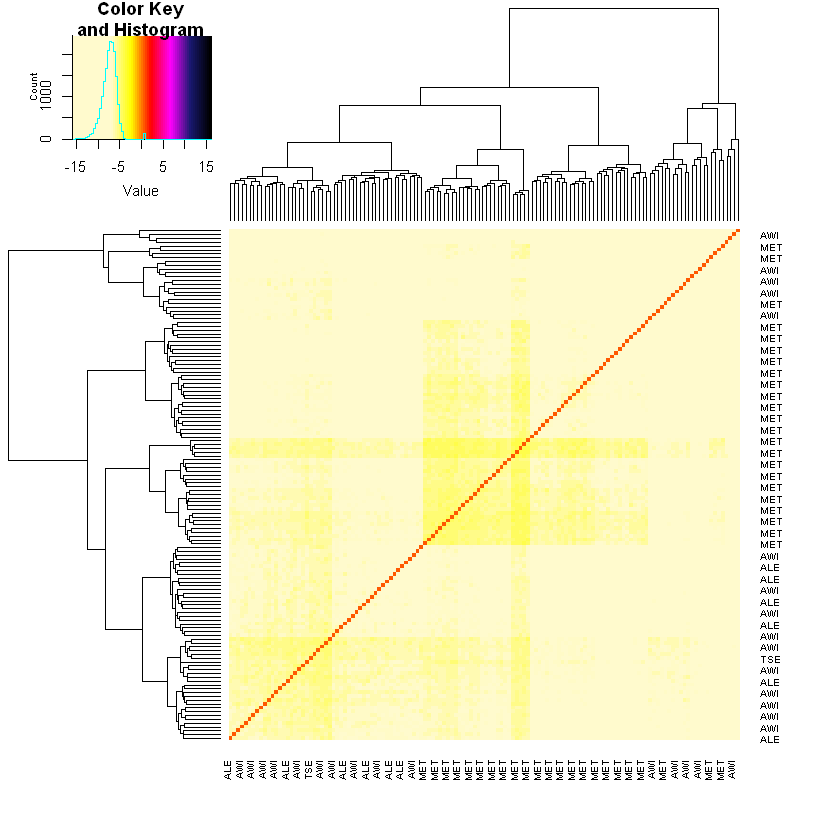

In [19]:
## Visualise the relatedness matrix
relatedness_matrix %>% 
    select(-INDV1) %>% 
    as.matrix() %>% 
    heatmap.2(trace="none", cexRow=0.6,cexCol = 0.6, labRow = ind, labCol = ind,col= colorRampPalette(c("lemonchiffon", "lemonchiffon", "lemonchiffon", "yellow", "red", "magenta", "midnightblue", "black"))(70))

In [4]:
# Convert the relatedness matrix to a KINGmat 
KINGmat <- relatedness_matrix %>% 
    select(-INDV1) %>% 
    as.matrix()
KINGmat[1:5,1:5]

ETH_ALE_CW001,ETH_ALE_CW002,ETH_ALE_CW014,ETH_ALE_CW015,ETH_ALE_CW030
0.50000,-5.86275,-6.24561,-6.03636,-7.95238
-5.86275,0.50000,-5.69231,-6.40000,-8.81081
-6.24561,-5.69231,0.50000,-6.03571,-7.37209
-6.03636,-6.40000,-6.03571,0.50000,-8.02439
-7.95238,-8.81081,-7.37209,-8.02439,0.50000


In [20]:
## Import the vcf file
library(snpR)
myvcf <- read_vcf("data/221203_filtered_sim_nob_populations.snps.vcf") #1697 loci

Scanning file to determine attributes.
File attributes:
  meta lines: 14
  header_line: 15
  variant count: 1697
  column count: 143
Meta line 14 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 1697
  Character matrix gt cols: 143
  skip: 0
  nrows: 1697
  row_num: 0
Processed variant: 1697
All variants processed


In [25]:
## Convert the vcf file to a gds file
library(SNPRelate)
vcf.fn <- "data/221203_filtered_sim_nob_populations.snps.vcf"  ## need to define the file path
snpgdsVCF2GDS(vcf.fn, out.fn = "data/eth_radseq.gds")

Start file conversion from VCF to SNP GDS ...
Method: extracting biallelic SNPs
Number of samples: 134
Parsing "data/221203_filtered_sim_nob_populations.snps.vcf" ...
	import 1697 variants.
+ genotype   { Bit2 134x1697, 55.5K } *
Optimize the access efficiency ...
Clean up the fragments of GDS file:
    open the file 'data/eth_radseq.gds' (64.2K)
    # of fragments: 46
    save to 'data/eth_radseq.gds.tmp'
    rename 'data/eth_radseq.gds.tmp' (63.8K, reduced: 312B)
    # of fragments: 20


In [26]:
genofile <- snpgdsOpen("data/eth_radseq.gds")

### Run PC-AiR

In [7]:
library(GENESIS)
# run PC-AiR on the data genofile
mypcair <- pcair(genofile, kinobj = KINGmat, divobj = KINGmat)

Using kinobj and divobj to partition samples into unrelated and related sets

Working with 134 samples

Identifying relatives for each sample using kinship threshold 0.0220970869120796

No relatives found using threshold 0.0220970869120796

Unrelated Set: 134 Samples 
Related Set: 0 Samples

Performing PCA on the Unrelated Set...



Principal Component Analysis (PCA) on genotypes:
Excluding 0 SNP on non-autosomes
Excluding 0 SNP (monomorphic: TRUE, MAF: NaN, missing rate: NaN)
    # of samples: 134
    # of SNPs: 1,697
    using 1 thread
    # of principal components: 32
PCA:    the sum of all selected genotypes (0,1,2) = 425225
CPU capabilities: Double-Precision SSE2
Fri Sep 22 13:26:34 2023    (internal increment: 5592)
[==================================================] 100%, completed, 0s  
Fri Sep 22 13:26:34 2023    Begin (eigenvalues and eigenvectors)
Fri Sep 22 13:26:34 2023    Done.


* This gives us the information on Related and Unrelated individuals. We can see there is zero samples within the related set.

In [9]:
# Partition a Sample without Running PCA
part <- pcairPartition(kinobj = KINGmat, divobj = KINGmat)

Using kinobj and divobj to partition samples into unrelated and related sets

Working with 134 samples

Identifying relatives for each sample using kinship threshold 0.0220970869120796

No relatives found using threshold 0.0220970869120796



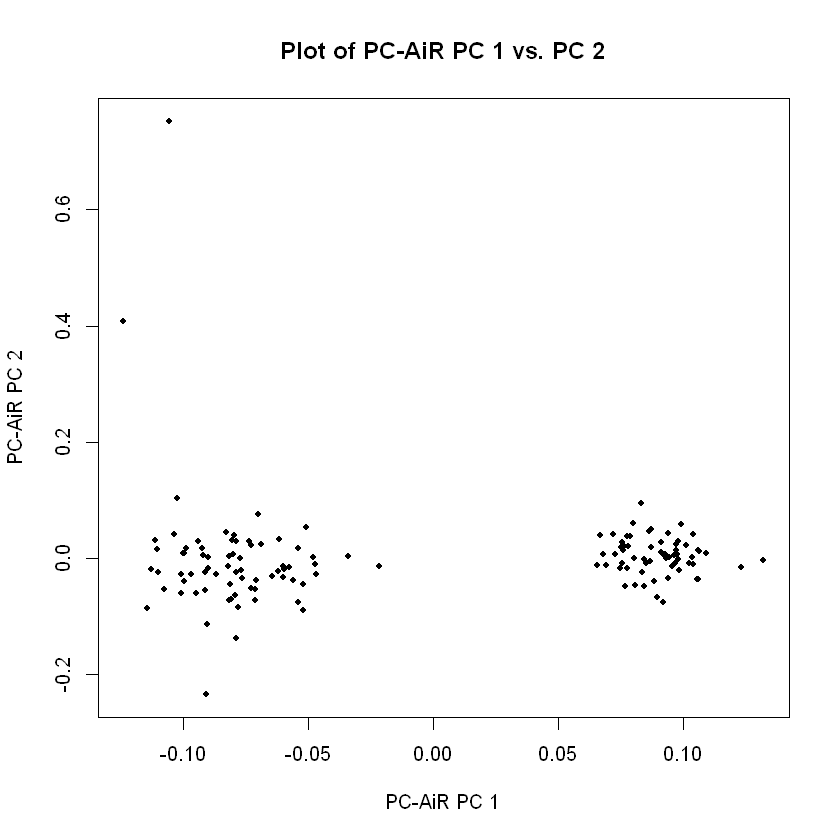

In [10]:
# plot top 2 PCs
plot(mypcair)

* The default is to plot PC values as black dots and blue pluses for individuals in the “unrelated subset” and “related subsets” respectively.
* We don't have any blue pluses in the plot, which means that there are no related individuals in the dataset
* Check how it looks like with the related individuals in the [tutorial](https://bioconductor.org/packages/devel/bioc/vignettes/GENESIS/inst/doc/pcair.html#relatedness-estimation-adjusted-for-principal-components-pc-relate-1)

### Run PC-Relate

In [13]:
library(GWASTools)
genofile <- GenotypeBlockIterator(genofile)

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function 'nsnp' for signature '"SNPGDSFileClass"'


For some reason, I am getting this error: `Error in (function (classes, fdef, mtable) : unable to find an inherited method for function 'nsnp' for signature '"SNPGDSFileClass"'`
I haven't been able to fix this. `.gds` file is not being read by the `pcRelate` function while it is working perfectly fine with `pcAir` function.
With `pcAir` function alone, we can see that there are no related individuals in the dataset. 

In [14]:
# Running PC-relate for genodata
mypcrelate <- pcrelate(genofile, pcs = mypcair$vectors[,1:2], 
                       training.set = mypcair$unrels,
                       BPPARAM = BiocParallel::SerialParam())

## plot output from PC-Relate
plot(mypcrelate$kinBtwn$k0, mypcrelate$kinBtwn$kin, xlab="k0", ylab="kinship")

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function 'pcrelate' for signature '"SNPGDSFileClass"'


## Further references:
1. Population Structure and Relatedness Inference using the GENESIS Package. [Link](https://bioconductor.org/packages/devel/bioc/vignettes/GENESIS/inst/doc/pcair.html#relatedness-estimation-adjusted-for-principal-components-pc-relate-1)
2. Analyzing Sequence Data using the GENESIS Package. [Link](https://bioconductor.org/packages/devel/bioc/vignettes/GENESIS/inst/doc/assoc_test_seq.html#convert-vcf-to-gds)